<!-- 
Jupyter Notebook developed by Sergio A. Alcala-Corona under the licence: Creative Commons BY-NC-SA 4.0
Please notify me if you plan on using it for teaching!  sergio.alcala.c@gmail.com 
-->
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" align="right"/></a>

# Modelación computacional de sistemas biológicos.
## Temas selectos de Inteligencia Artificial
$\;$
### Sergio A. Alcalá Corona 
### Matías Alvarado
---

# I. Modelación matemática de sistemas en biología
---

## 1. Modelos Deterministas (Ecuaciones Diferenciales Ordinarias)
---

## Modelos poblacionales y estabilidad dinámica.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import *
%matplotlib notebook

### Modelos Poblacionales 

### Ejemplo: Modelo de Malthus.

## $f(P) = \frac{dP}{dt} = \dot{P} = rP$

## $P(t) = P_0 e^{rt}$

### Integración numérica: Metodo de Euler 1 Dimensión

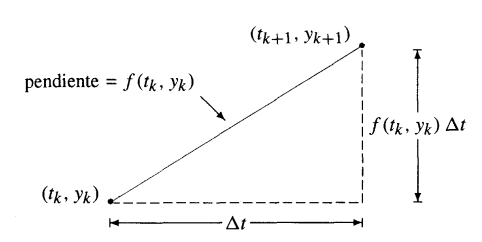

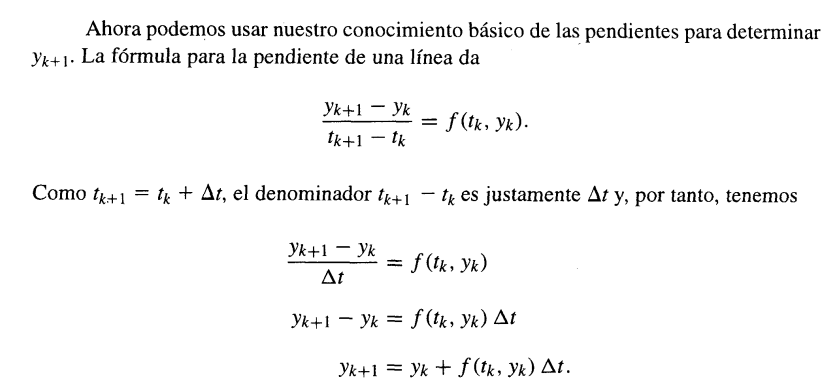

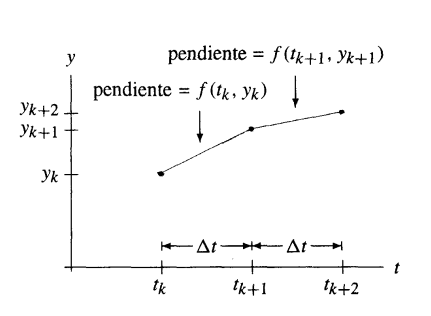

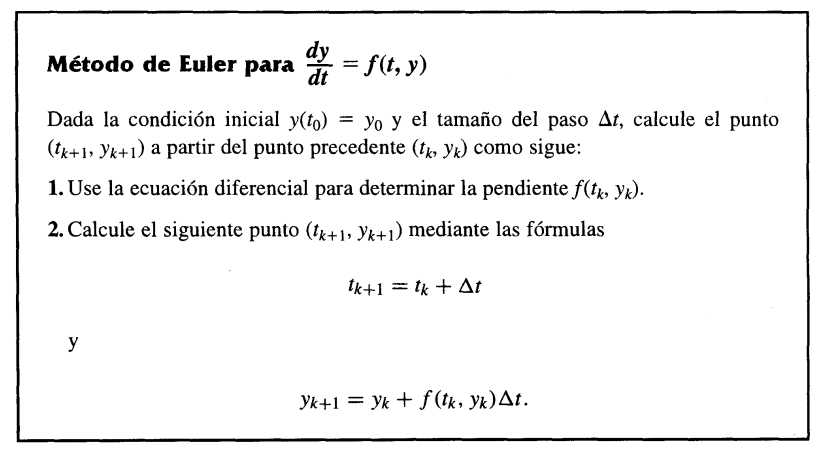

In [2]:
def Euler1D(f,x0,t0,tf,dt):
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x)*dt
        t = t + dt
        X.append(x)
        T.append(t)
  
    return X,T
#   return X


### Ejemplo: Modelo de Malthus.

## $f(P) = \frac{dP}{dt} = \dot{P} = rP$

## $P(t) = P_0 e^{rt}$

In [3]:
def Malthus(P):
    r = 1
    return r*P

In [4]:
t0 = 0
p0 = 20


P,T = Euler1D(Malthus,p0,t0,10,0.1)
# P,T = Euler1D(Malthus,p0,t0,10,.01)   # con un paso mas fino

<IPython.core.display.Javascript object>


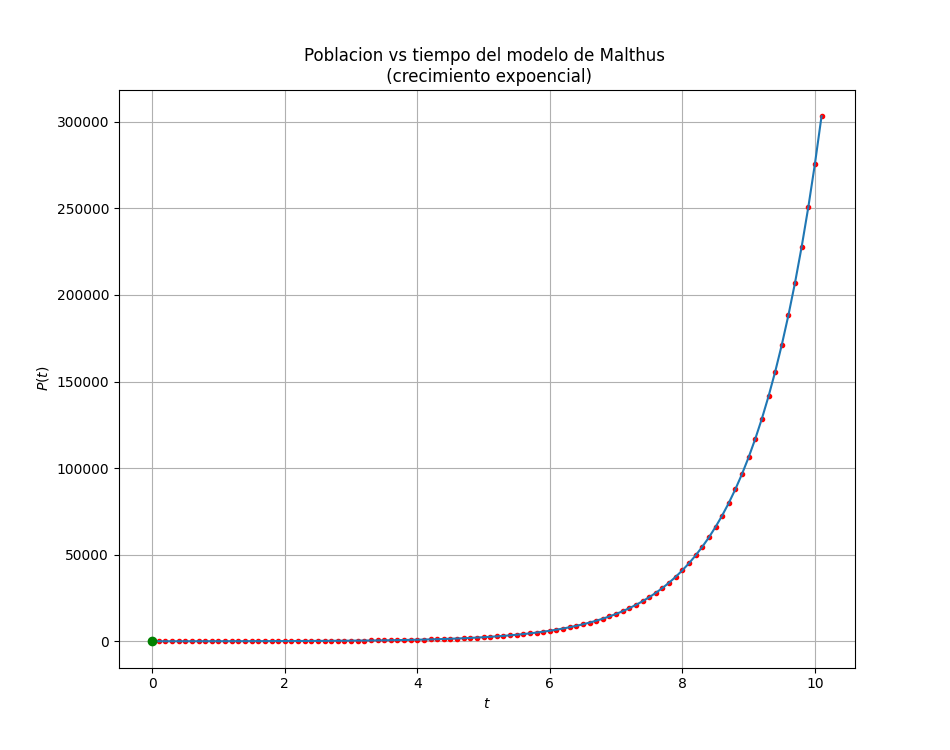

Text(0, 0.5, '$P(t)$')

In [5]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(T,P,'r.')   # puntos
plt.plot(T,P)        # linea
plt.plot(t0,p0,'go') # condicion inicial

plt.title("Poblacion vs tiempo del modelo de Malthus \n (crecimiento expoencial)")
plt.xlabel("$t$")
plt.ylabel("$P(t)$")


<IPython.core.display.Javascript object>


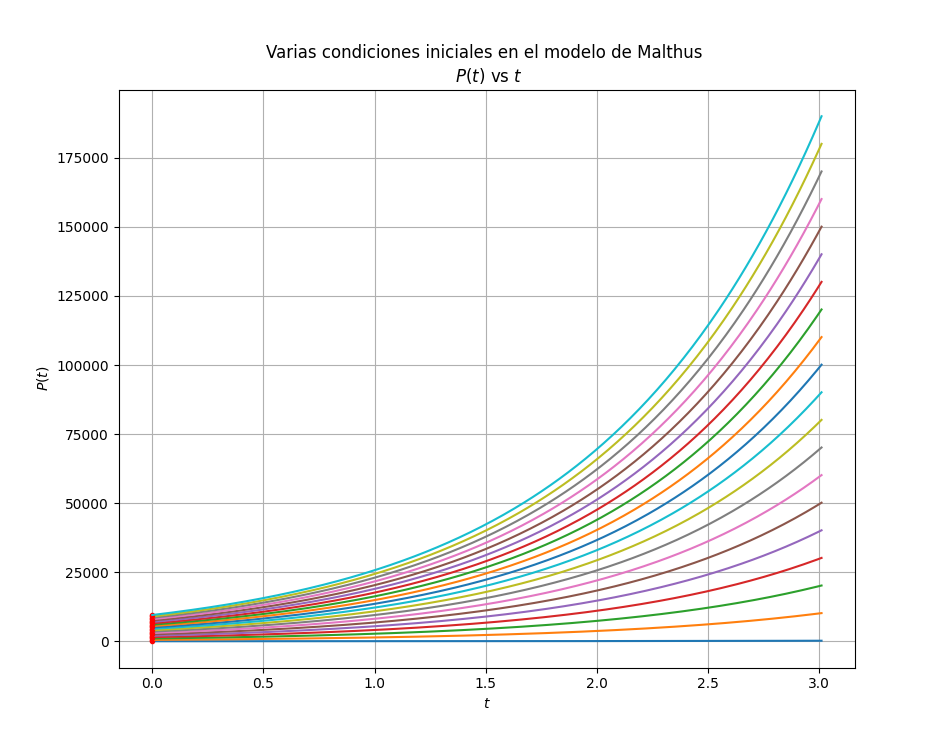

Text(0, 0.5, '$P(t)$')

In [6]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

t0 = 0
for p0 in range(10,10000,500):
    P,T = Euler1D(Malthus,p0,t0,3,0.01)
    plt.plot(t0,p0,'r.')
    plt.plot(T,P)
    
plt.title("Varias condiciones iniciales en el modelo de Malthus \n $P(t)$ vs $t$")
plt.xlabel("$t$")
plt.ylabel("$P(t)$") 

## Ejemplo: Ecuación Logística (no lineal).

## $\dot{P} = rP(1 - \frac{P}{K})$

## $\frac{dP}{dt} = f(P) = rP(1 - \frac{P}{K})$

## $f(P^*) = 0$

## $P(t) =$ ??

### Poblaciones de equilibrio:

## $P^* = 0$

## $P^* = K$

In [7]:
def Logistica(P):
    r = .5
    K = 50
    return r*P*(1 - float(P)/float(K))

def Logistica2(P,r,K):      # Una version para introducir los parametros
    return r*P*(1 - float(P)/float(K))  

In [8]:
t0 = 0
p0 = 2

P,T = Euler1D(Logistica,p0,t0,15,0.1)

<IPython.core.display.Javascript object>


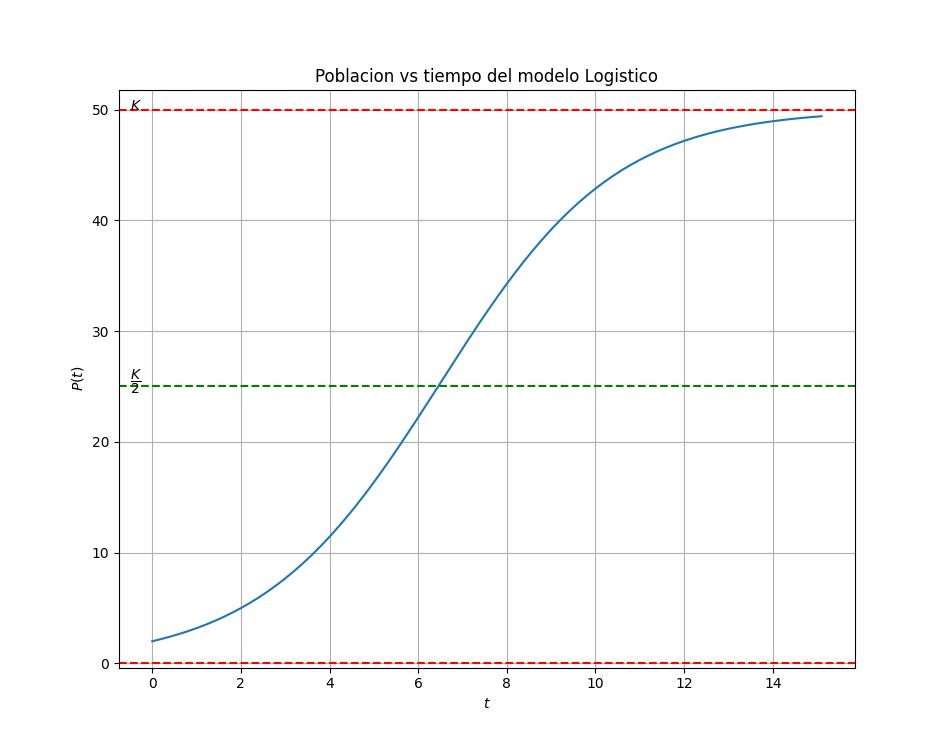

In [9]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

K = 50
plt.plot(T,P)

plt.title("Poblacion vs tiempo del modelo Logistico")
plt.xlabel("$t$")
plt.ylabel("$P(t)$") 

plt.axhline(0, color='red', linestyle='--')

ax.text(-0.5,K,'$K$')
plt.axhline(K, color='red', linestyle='--')

ax.text(-0.5,K/2,'$\dfrac{K}{2}$')
plt.axhline(K/2, color='green', linestyle='--')

<IPython.core.display.Javascript object>


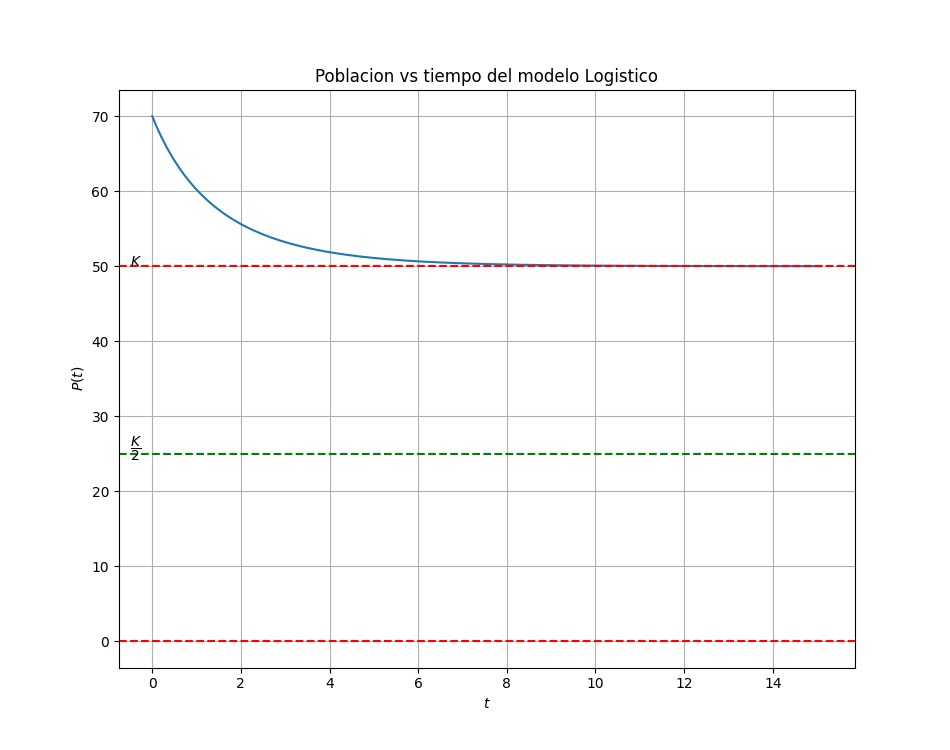

In [10]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


t0 = 0
p0 = 70
P,T = Euler1D(Logistica,p0,t0,15,0.1)

K = 50
plt.plot(T,P)

plt.title("Poblacion vs tiempo del modelo Logistico")
plt.xlabel("$t$")
plt.ylabel("$P(t)$") 

plt.axhline(0, color='red', linestyle='--')

ax.text(-0.5,K,'$K$')
plt.axhline(K, color='red', linestyle='--')

ax.text(-0.5,K/2,'$\dfrac{K}{2}$')
plt.axhline(K/2, color='green', linestyle='--')

<IPython.core.display.Javascript object>


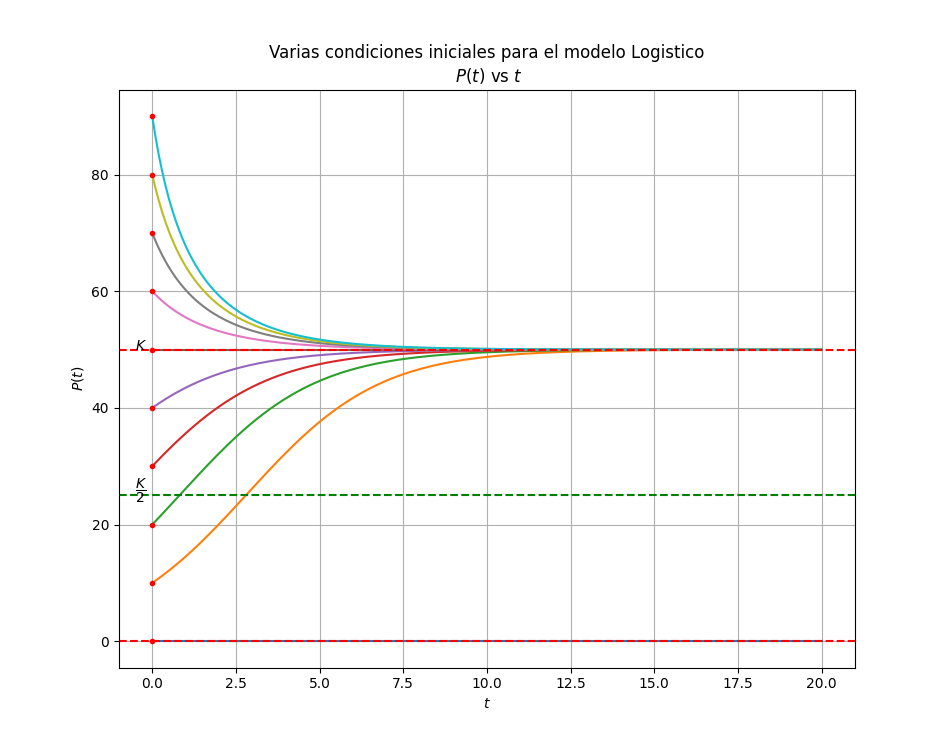

In [11]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


K = 50
for p0 in range(0,100,10):
    P, T = Euler1D(Logistica,p0,t0,20,0.1)
#     P, T = Euler1D(Logistica2(p0,r,K),p0,t0,20,0.1)
    plt.plot(T,P)
    plt.plot(t0,p0,'r.')
    
    
plt.title("Varias condiciones iniciales para el modelo Logistico\n $P(t)$ vs $t$")
plt.xlabel("$t$")
plt.ylabel("$P(t)$") 

plt.axhline(0, color='red', linestyle='--')

ax.text(-0.5,K,'$K$')
plt.axhline(K, color='red', linestyle='--')

ax.text(-0.5,K/2,'$\dfrac{K}{2}$')
plt.axhline(K/2, color='green', linestyle='--')    

### El Mapeo Logistico

## $x_{n+1} = rx_n(1 -x_n)$

In [12]:
def Logistico(r,x):
    return r*x*(1-x) 

<IPython.core.display.Javascript object>


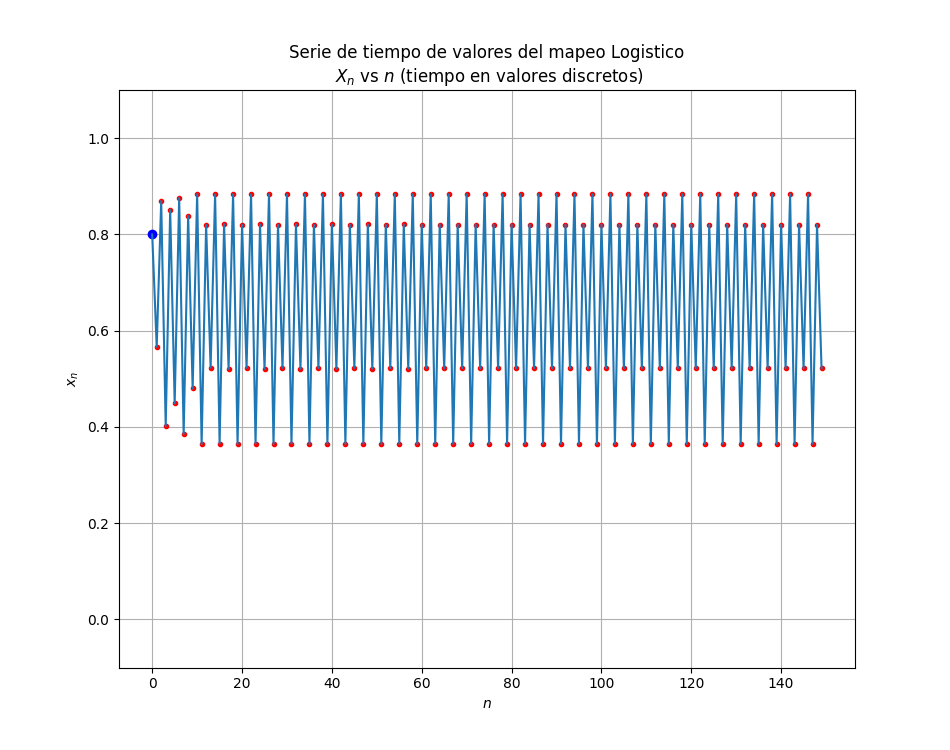

interactive(children=(FloatSlider(value=0.8, description='x0', max=1.0, step=0.01), FloatSlider(value=3.54, de…

In [50]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))
def update(x0=0.8,r = 3.54,n = 150):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()

    X=[]

    x = x0
    X.append(x)

    for i in range(1,n):

        x = Logistico(r,x)
        X.append(x)
        
    plt.title("Serie de tiempo de valores del mapeo Logistico\n $X_n$ vs $n$ (tiempo en valores discretos)")
    plt.xlabel("$n$")
    plt.ylabel("$x_n$")
    
    plt.plot(X,'r.')
    plt.plot(x0,'bo')
    plt.plot(X)

### Tecnica de iteración de Teleraña (Coweb)

<IPython.core.display.Javascript object>


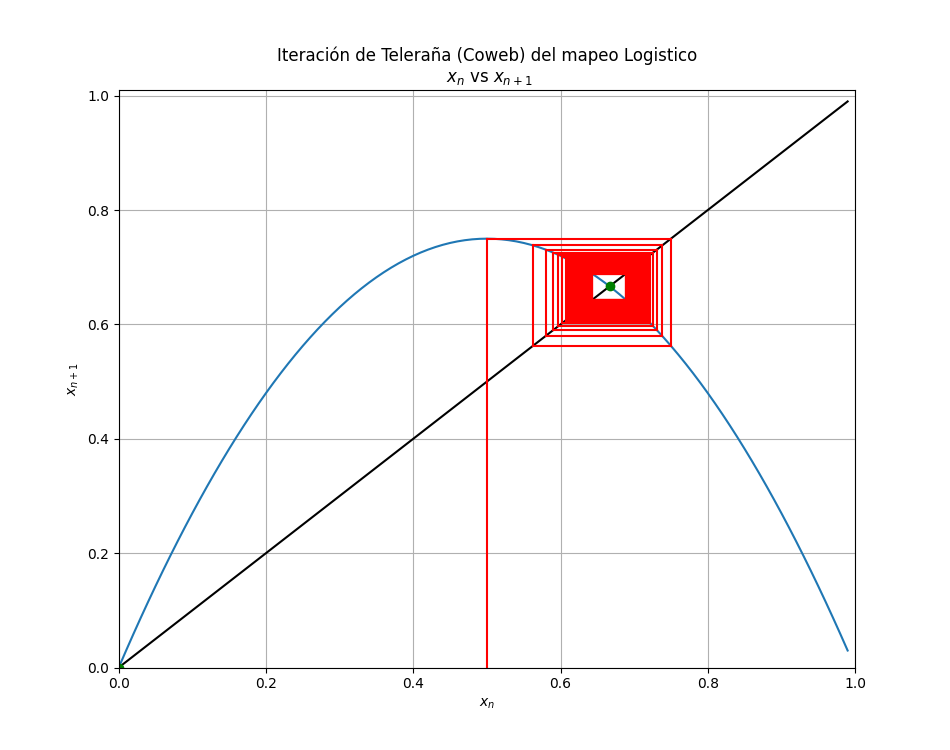

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=3.0, des…

In [49]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 
def update(x0=0.5,r = 3.):
    
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
        
        
    plt.title("Iteración de Teleraña (Coweb) del mapeo Logistico\n $x_n$ vs $x_{n+1}$")
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")        
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    plt.plot(T,r*T*(1-T) ) 
    
    plt.plot(0.,0.,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    

    x = x0
        
    if x0 < eqx:
        
        xV = [0, x0]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,x0), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if x0 < eqx:
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

### Veamos ambas gráficas juntas.

<IPython.core.display.Javascript object>


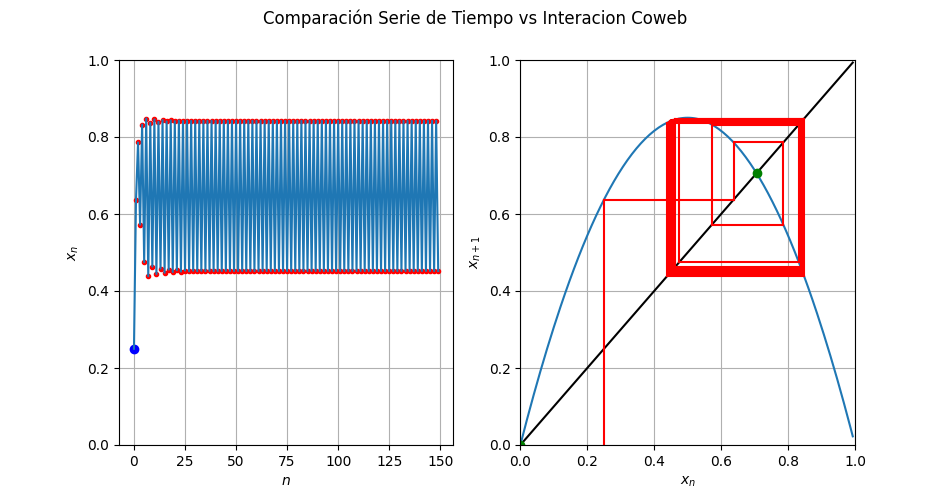

interactive(children=(FloatSlider(value=0.25, description='x0', max=1.0, step=0.01), FloatSlider(value=2.0, de…

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.5, 5))
fig.suptitle('Comparación Serie de Tiempo vs Interacion Coweb')


ax1.set_ylim([0, 1])
ax1.set_xlim([-1, 159])
ax1.set(xlabel='$n$', ylabel='$x_n$')
ax1.grid(True)


ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.grid(True)
ax2.set(xlabel='$x_n$', ylabel='$x_{n+1}$')

    
@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))
def update(x0=0.25,r = 2, n = 150):    
    
    
    X=[]

    x = x0 
    X.append(x)
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
        
    ax1.cla()
    ax1.set_ylim([0, 1])
    ax1.set(xlabel='$n$', ylabel='$x_n$')    
    ax1.grid(True)
    
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])    
    


    T=np.linspace(0,1,n,endpoint=False)
    
    ax2.plot(T,T, color="black")
    ax2.plot(T,r*T*(1-T) ) 
    
    ax2.plot(0.,0.,'go')   
    
    eqx = float(r-1)/float(r)    
    ax2.plot(eqx,Logistico(r,eqx),'go')    

       
    if x0 < eqx:
        
        xV = [0, x0]        
        yV = [x0, x0]       
        ax2.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,x0), 0]        
        ax2.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):     
        
        if x == x0:            
            if x0 < eqx:
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,x) ###

        Pf = [a, x] 
        ax2.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        ax2.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        ax2.plot(xV, yV)   
        
        X.append(x)    

    ax1.plot(X,'r.')
    ax1.plot(x0,'bo')
    ax1.plot(X) 

### Ruta al caos

<IPython.core.display.Javascript object>


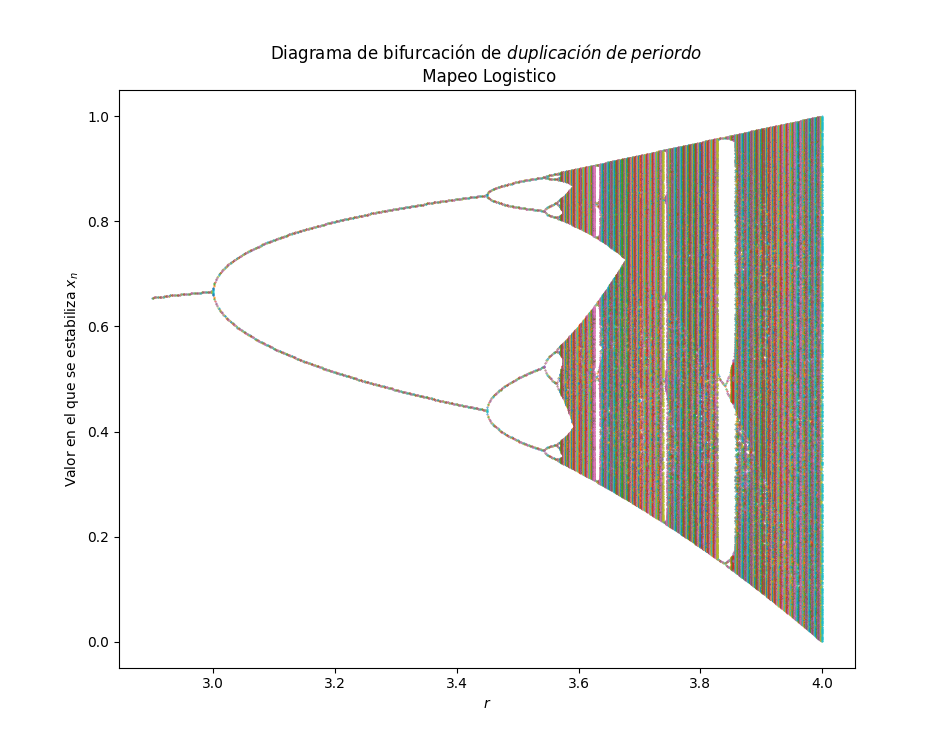

In [58]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

x0=0.5
n=1000
itSbl=1000


for r in np.arange(2.9, 4., 0.001):
# for r in np.arange(0. , 4., 0.001):
    
    R=[]
    X=[]    
    
    R.append(r)
    xn=x0

    for i in range(0,n):
        xn=Logistico(r,xn)

    X.append(round(xn,3))    
    
    
    for i in range(1,itSbl):
        xn=Logistico(r,xn)
        
        if round(xn,3) not in X:          
            X.append(round(xn,3))
            R.append(r)       
        
    plt.plot(R,X,'.', markersize=.75)
    
    plt.title("Diagrama de bifurcación de $\it{duplicación \; de \; periordo}$ \n Mapeo Logistico")
    plt.xlabel("$r$")
    plt.ylabel("Valor en el que se estabiliza $x_n$")
    

### Sistemas de 2 dimensiones

#### Ejemplo: el oscilador aromónico

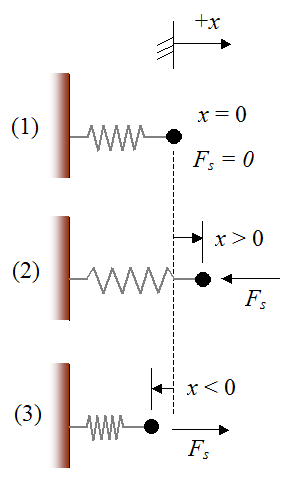

## $\vec{F}_s = m\vec{a}$

## $-kx = m a_x$

## Agregamos el térmnino de fricción

## $-kx -b v_x= ma_x$

## $- kx - b \dfrac{dx}{dt} = m \dfrac{d^2x}{dt^2} $

### Reacomodando términos

## $m \dfrac{d^2x}{dt^2} + b \dfrac{dx}{dt} + kx = 0 $

# $m  \ddot{x} + b \dot{x} + kx = 0 $



# Así, tenemos:

# $\ddot{x} + \frac{b}{m} \dot{x} + \frac{k}{m} x = 0 $

# $\ddot{x} = - \frac{b}{m} \dot{x} - \frac{k}{m} x $


## Y podemos cambiar de variable de la siguiente manera:

## $\dot{x} = v$ 

### y así  

## $\ddot{x} = \dot{v}$

### entonces:  

## $\dot{x} = v$ 

## $\dot{v} = - \frac{b}{m} v - \frac{k}{m} x $

### Sean  $\omega_0^2 \equiv \frac{k}{m}$  y  $\beta \equiv \frac{b}{m}$

## $\dot{x} = v$ 

## $\dot{v} = - \beta  v - \omega_0^2 x $



## Así entonces el sistema dinámico:

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2 x - \beta v $

## Lo podemos escribir en forma matricial ($\dot{\vec{x}} = \mathbb{A} \vec{x} $) como:

## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & - \beta
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$


### Metodo de Euler 2 Dimensiones

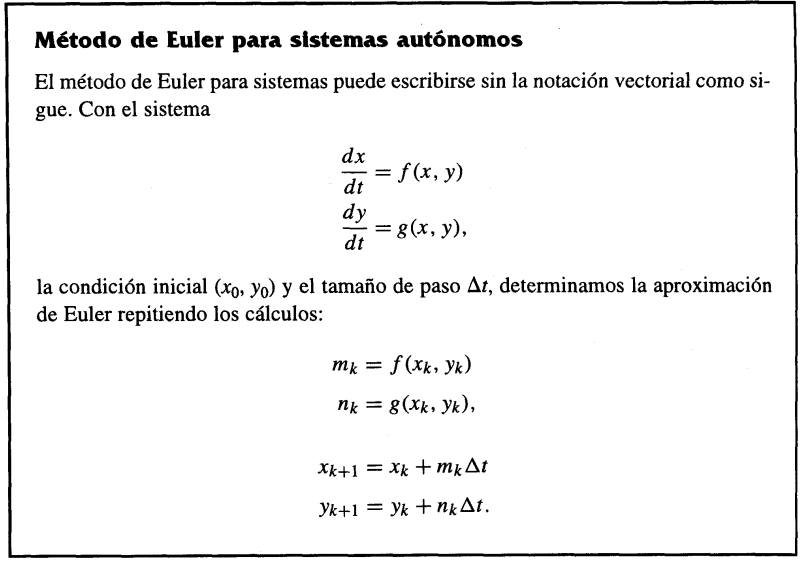

In [17]:
def Euler2D(f,x0,t0,tf,dt):  ## x0 es un vector de 2D (x0,y0)
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 2D

    while (t<tf):

        x = x + f(x)*dt  ## x es un vector de 2D
        t = t + dt
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T

## Ejemplo: Oscilador Armónico (simple).

# $\ddot{x} = - \frac{k}{m} x $

### Haciendo el cambio de variable  $\dot{x} = v$ 

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2 x$

## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$


In [18]:
def OsciladorSimple(x):  # x es un vector en 2D  (x,v)
    w0 = 1
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0]

    return y

In [19]:
x0 = np.array([1,0]) 
# x0 = np.array([0.1,0.1])

X1,X2,T = Euler2D(OsciladorSimple,x0,0,50,0.0001)

<IPython.core.display.Javascript object>


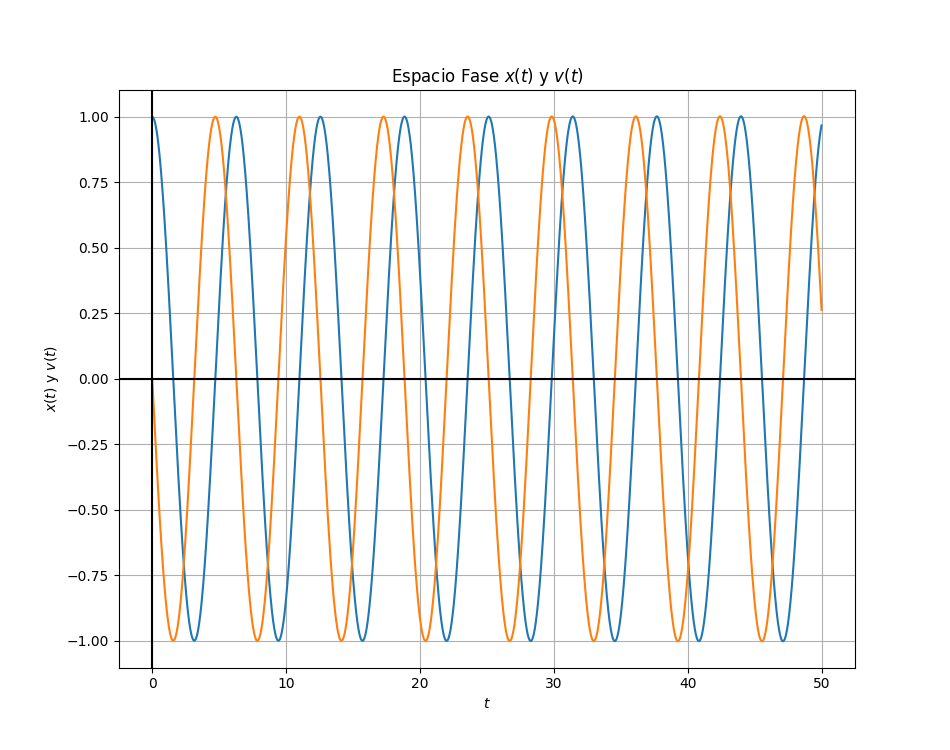

Text(0, 0.5, '$x(t)$ y $v(t)$')

In [20]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(T,X1) 
plt.plot(T,X2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x(t)$ y $v(t)$")
plt.xlabel("$t$")
plt.ylabel("$x(t)$ y $v(t)$")

<IPython.core.display.Javascript object>


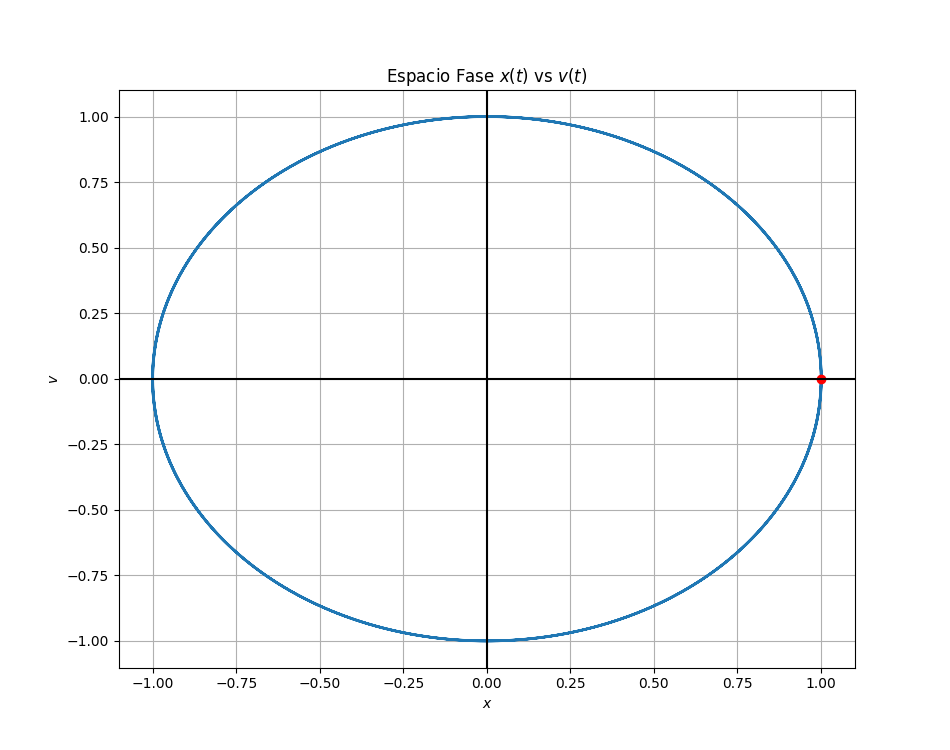

Text(0, 0.5, '$v$')

In [21]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(X1,X2)
# plt.plot(X1,X2,'b.')
plt.plot(x0[0],x0[1],'ro')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
# plt.title("Espacio Fase $x_1$ vs $x_2$")
plt.title("Espacio Fase $x(t)$ vs $v(t)$")
# plt.xlabel("$x_1$")
# plt.ylabel("$x_2$")
plt.xlabel("$x$")
plt.ylabel("$v$")

<IPython.core.display.Javascript object>


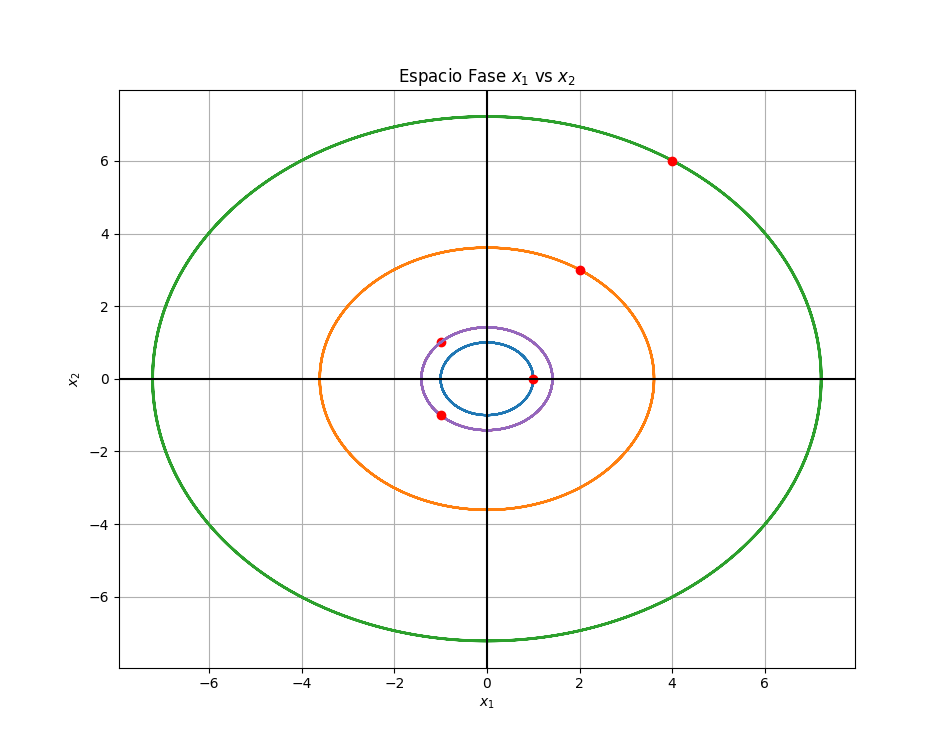

Text(0, 0.5, '$x_2$')

In [22]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

# for i, j in zip([1, 2, 3], [4, 5, 6]):
for i, j in [[1,0], [2,3], [4,6], [-1,1], [-1,-1]]:
    x0 = np.array([i,j])

    # X1,X2,T = Euler2D(OsciladorSimple,np.array([0.1,0.1]),0,100,0.1)
    X1,X2,T = Euler2D(OsciladorSimple,x0,0,50,0.0001)

    plt.plot(X1,X2)
    plt.plot(x0[0],x0[1],'ro')
    
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x_1$ vs $x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## Ejemplo: Oscilador Armónico (amortiguado).

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2  x - \beta v $

## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & - \beta
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$


In [23]:
def OsciladorAmortiguado(x):  # x es un vector en 2D  (x,v)
    w0 = 1
    beta = .3
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y


In [24]:
x0 = np.array([1,0]) 
# x0 = np.array([0.1,0.1])

X1,X2,T = Euler2D(OsciladorAmortiguado,x0,0,100,0.001)


<IPython.core.display.Javascript object>


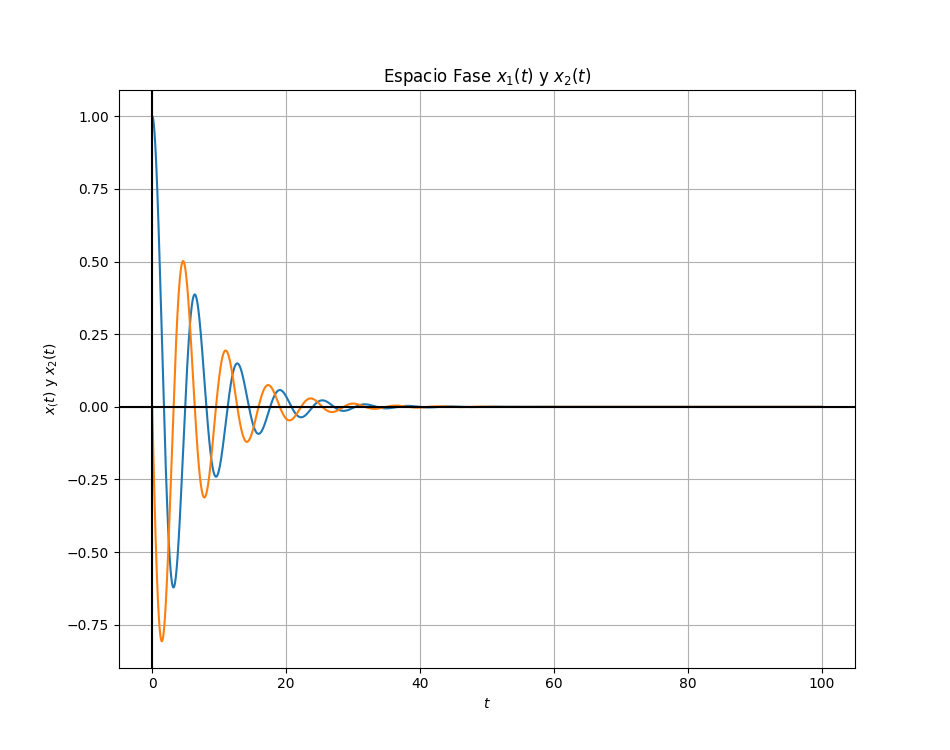

Text(0, 0.5, '$x_(t)$ y $x_2(t)$')

In [25]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(T,X1) 
plt.plot(T,X2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x_1(t)$ y $x_2(t)$")
plt.xlabel("$t$")
plt.ylabel("$x_(t)$ y $x_2(t)$")

<IPython.core.display.Javascript object>


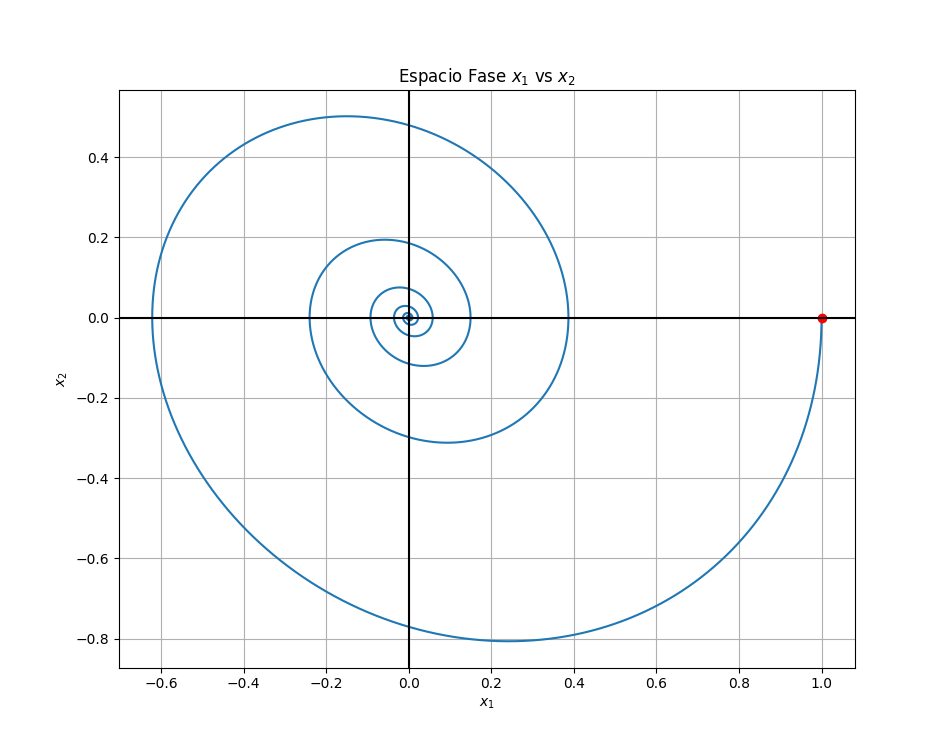

Text(0, 0.5, '$x_2$')

In [26]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

plt.plot(X1,X2)
plt.plot(x0[0],x0[1],'ro')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x_1$ vs $x_2$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## Tipos de estabilidad en sistemas 2D

### Para sistemas de 2 dimensiones, se tiene que:

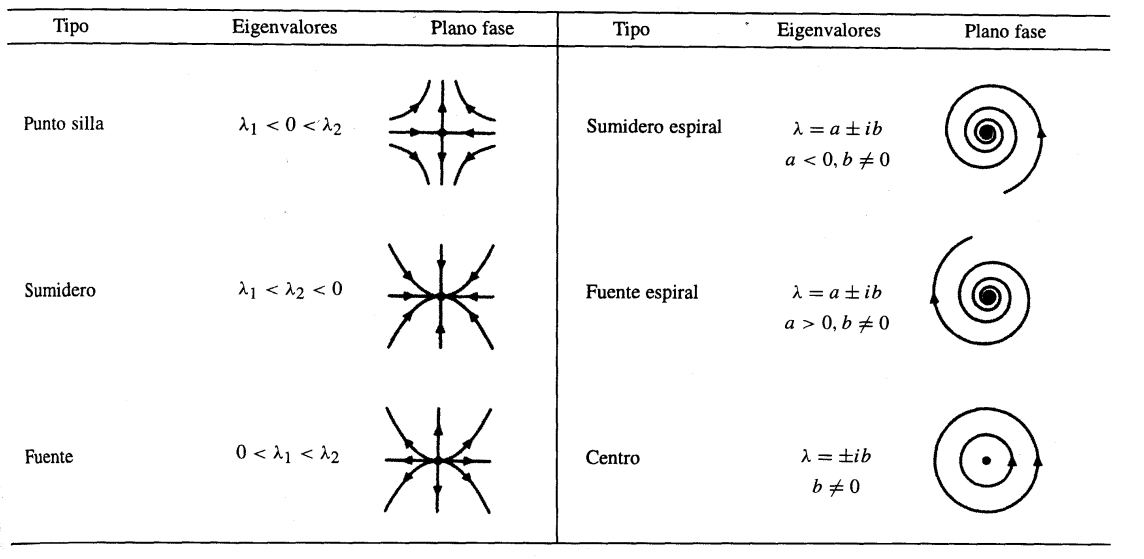

### Generalizando y optimizando código.

In [27]:

## Funciones para los Osciladores con incorporacion de parametros 

def OsciladorSimple(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0]

    return y

def OsciladorAmortiguado(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    beta = params[1]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y


## Generalización del Metodo de Euler para n dimensiones e incorporacion de parametros

def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T



## Funciones para graficar el Campo de Pendientes

def CampoPend(f,xmin,xmax,ymin,ymax,params,escala,paso): 
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            plt.quiver(i, j, y[0], y[1] , width=0.001, scale=escala)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
    
    
# Version Normalizada, para una mejor visulacizacion (campo de direcciones) 

def CampoPendNorm(f,xmin,xmax,ymin,ymax,params,paso):    
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            N = np.sqrt(y[0]**2+y[1]**2)  #aqui se calcula la norma del vector
            
            if (N != 0): # y se normaliza si el vector es diferente del vector 0
                U, V = float(y[0])/float(N), float(y[1])/float(N)
            else:
                U, V = y[0],y[1]

            plt.quiver(i, j, U, V , width=0.001, scale=50)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
       
        

<IPython.core.display.Javascript object>


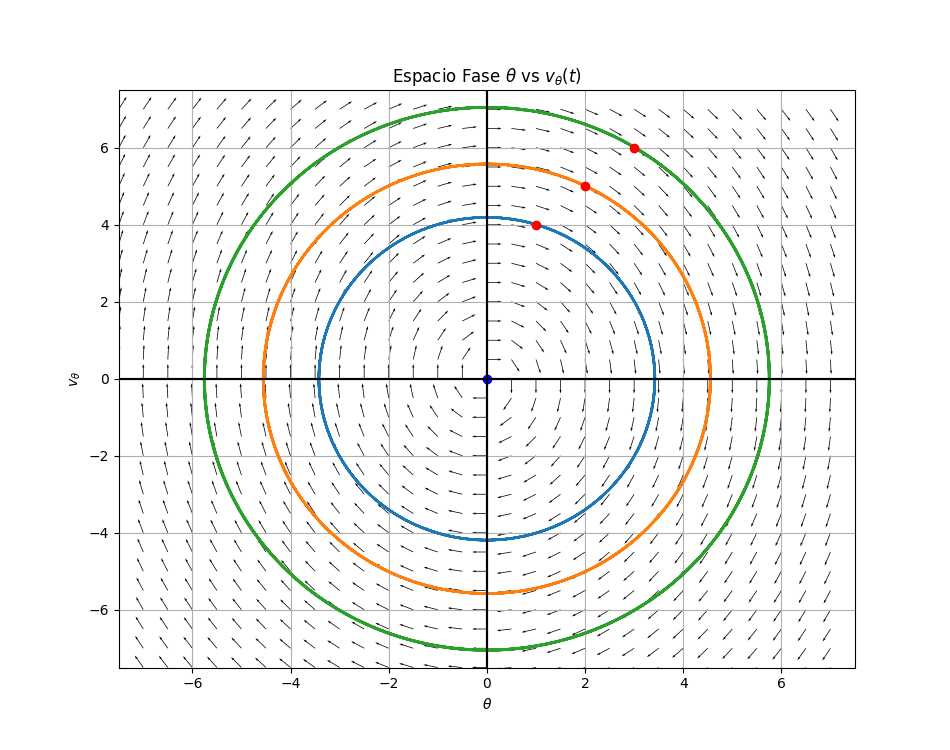

interactive(children=(FloatSlider(value=1.5, description='w0', max=5.0, min=0.1), Output()), _dom_classes=('wi…

In [28]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


@widgets.interact(w0=(0.1, 5, 0.1))

def update(w0 = 1.5):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)

    params = np.array([w0])

    for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
        x0 = np.array([i,j])

        X,T = EulerND(OsciladorSimple,x0,0,50,0.0001,params)

        plt.plot(X[0],X[1])
        plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal


    #### Grafica ######## 

    plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 

    # Titulos de la grafica
    plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
    plt.xlabel("$\\theta$")
    plt.ylabel("$v_{\\theta}$")

    # Ejes y limites de la grafica
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim([-7.5, 7.5])
    plt.ylim([-7.5, 7.5])

    ## Dibujando campo de pendientes

    CampoPendNorm(OsciladorSimple,-7.5,7.5,-7.5,7.5,params,0.5) #version normalizada

<IPython.core.display.Javascript object>


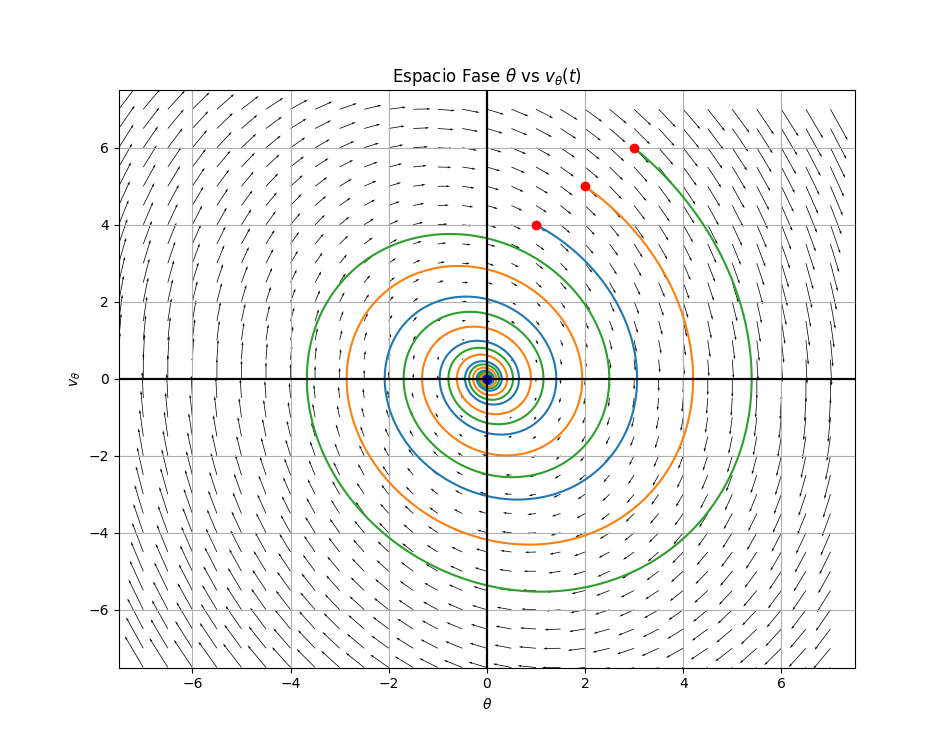

interactive(children=(FloatSlider(value=1.5, description='w0', max=5.0, min=0.1), FloatSlider(value=0.3, descr…

In [29]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


@widgets.interact(w0=(0.1, 5, 0.1),beta=(0.1, 5, 0.1))

def update(w0 = 1.5, beta = 0.3):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)

    params = np.array([w0,beta])
    
    
    for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
        x0 = np.array([i,j])

        X,T = EulerND(OsciladorAmortiguado,x0,0,50,0.001,params)

        plt.plot(X[0],X[1])
        plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal


    #### Grafica ######## 

    plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 

    # Titulos de la grafica
    plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
    plt.xlabel("$\\theta$")
    plt.ylabel("$v_{\\theta}$")

    # Ejes y limites de la grafica
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim([-7.5, 7.5])
    plt.ylim([-7.5, 7.5])

    ## Dibujando campo de pendientes 

    CampoPend(OsciladorAmortiguado,-7.5,7.5,-7.5,7.5,params,300,0.5)



### En general culquier sistema dinámico de $m$ ecuaciones diferenciales con $n$ incognitas 


## $\dot{x}_1 = a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n$ 

## $\dot{x}_2 = a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n$ 

## $\vdots$

## $\dot{x}_n = a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n$ 


###  puede escribirse matricialmente como:


## $
\begin{pmatrix} 
\dot{x}_1  \\
\dot{x}_2  \\
\vdots \\
\dot{x}_n
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{2,2} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\begin{pmatrix} 
x_1  \\
x_2  \\
\vdots \\
x_n  \\
\end{pmatrix}
$

## Es decir de la forma:

## $\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t) $  

### problema de Cauchy

Dicho sistema tiene $n$ puntos de equilibrio y sus estabilidad depende de los valores y vectores propios de la matriz $\mathbb{A}$.

Los puntos de equilibrio se encuentran al resolver:

### $f(\vec{x},t) = \vec{0}$

### $\dot{\vec{x}^{*}}(t) = \vec{0}$

Es decir donde las soluciones no cambian en el tiempo. O bien:

### $f(\vec{x}^*,t) = \vec{0}$

### $\mathbb{A} \vec{x}^{*} = \vec{0}$

## $
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{2,2} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\begin{pmatrix} 
x_1^*  \\
x_2^*  \\
\vdots \\
x_n^*  \\
\end{pmatrix}
=
\begin{pmatrix} 
0  \\
0  \\
\vdots \\
0
\end{pmatrix}
$

Nota: Sólo funciona para ecuaciones autonomas, es decir, $f(\vec{x},t) = f(\vec{x})$ o bien para ecuaciones tipo $\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t)$, donde $\mathbb{A}$ tiene coeficientes constatntes $A_{ij} \neq a_{ij}(t)$

### Lo anterior no aplica para sistemas no lineales, como por ejemplo el Pendulo Simple

##  $\ddot{\theta} = - \omega_0^2 sen(\theta)$

$\;$

donde $\omega_0^2 = \dfrac{g}{l}$.

Que se puede reescribir como:

## $\dot{\theta} = v_{\theta}$ 
## $\dot{v_{\theta}} = - \omega_0^2 sen(\theta)$

$\;$

Sin embargo, no es posible asociar una matriz a este sistema, por la no-linealidad que presenta. 
Por lo que hay que resolverlo de forma numerica.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.